In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
train_data = []
data_files = ['Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv']
for file in data_files:
    data = pd.read_csv(file)
    train_data.append(data)
train_data = pd.concat(train_data)

In [3]:
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
train_data['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [5]:
def drop_fectures(features,data):
    data.drop(features,axis=1,inplace=True)

In [6]:
drop_fectures(['COMMENT_ID','AUTHOR','DATE'],train_data)

In [7]:
import re
re.findall("[A-Za-z]+","Hey Ravi57,How are you doing?")

['Hey', 'Ravi', 'How', 'are', 'you', 'doing']

In [8]:
def process_content(content):
    return " ".join(re.findall("[A-Za-z]+",content.lower()))

In [9]:
train_data['processed_content'] = train_data['CONTENT'].apply(process_content)
train_data.head()

,CONTENT,CLASS,processed_content
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check out this you tube channel kob...
1,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test i have to say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch v vtarggvgtwq check this out


In [10]:
drop_fectures(['CONTENT'],train_data)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data['processed_content'],train_data['CLASS'],test_size=0.2,random_state=57)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
x_train_counts = count_vect.fit_transform(x_train)

In [13]:
x_train_counts.shape

(1564, 3345)

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
tranformer = TfidfTransformer()
x_train_tfidf = tranformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(1564, 3345)

In [15]:
x_test_counts = count_vect.transform(x_test)
x_test_counts

<392x3345 sparse matrix of type '<class 'numpy.int64'>'
	with 2384 stored elements in Compressed Sparse Row format>

In [16]:
x_test_tfidf = tranformer.transform(x_test_counts)
x_test_tfidf

<392x3345 sparse matrix of type '<class 'numpy.float64'>'
	with 2384 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_tfidf,y_train)

LogisticRegression()

In [22]:
predictions = model.predict(x_test_tfidf)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       181
           1       0.97      0.89      0.93       211

    accuracy                           0.93       392
   macro avg       0.93      0.93      0.93       392
weighted avg       0.93      0.93      0.93       392



In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       181
           1       0.97      0.89      0.93       211

    accuracy                           0.93       392
   macro avg       0.93      0.93      0.93       392
weighted avg       0.93      0.93      0.93       392



In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_tfidf,y_train)

RandomForestClassifier()

In [26]:
predictions = model.predict(x_test_tfidf)
confusion_matrix(y_test,predictions)

array([[177,   4],
       [ 17, 194]], dtype=int64)

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       181
           1       0.98      0.92      0.95       211

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392



In [28]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_tfidf,y_train)

MultinomialNB()

In [29]:
predictions = model.predict(x_test_tfidf)
confusion_matrix(y_test,predictions)

array([[154,  27],
       [ 16, 195]], dtype=int64)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       181
           1       0.88      0.92      0.90       211

    accuracy                           0.89       392
   macro avg       0.89      0.89      0.89       392
weighted avg       0.89      0.89      0.89       392



In [31]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train_tfidf,y_train)

SVC()

In [32]:
predictions = model.predict(x_test_tfidf)
confusion_matrix(y_test,predictions)

array([[175,   6],
       [ 22, 189]], dtype=int64)

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       181
           1       0.97      0.90      0.93       211

    accuracy                           0.93       392
   macro avg       0.93      0.93      0.93       392
weighted avg       0.93      0.93      0.93       392



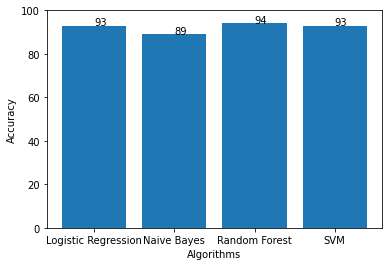

In [34]:
name = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM']
val = [93, 89, 94, 93]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
maxy = 100
miny = 0
plt.ylim(miny, maxy)
plt.bar(name, val ,label = val)
addlabels(name, val)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()